In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# 이미지를 파일로 출력하고 로딩한다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

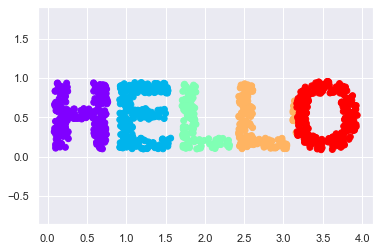

In [2]:
X = make_hello(1000)
colorize = dict(c=X[:,0],cmap = plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

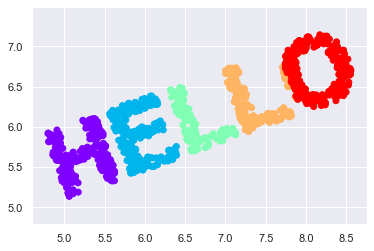

In [3]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle)  # 라디안  - 호의 길이
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R)
X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

(1000, 1000)


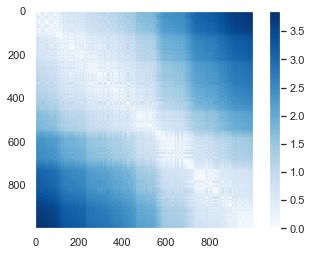

In [4]:
# 각 점들간의 상호거리
from sklearn.metrics import pairwise_distances  # 디폴트 - 유클리디안 거리
D = pairwise_distances(X) # 거리행렬
print(D.shape)
D[:5,:5]

plt.imshow(D, zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()

In [5]:
D2 = pairwise_distances(X2)
np.allclose(D,D2) # 원형을 유지하고 있음

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


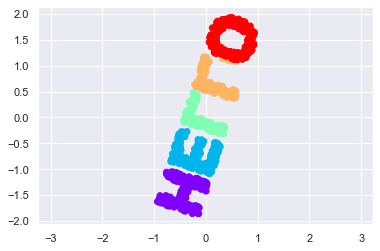

In [6]:
# manifold = 다형체

from sklearn.manifold import MDS   # multi dimention scale?
model = MDS(n_components=2, dissimilarity='precomputed',  #precomputed : 미리 계산된 거리행렬을 이용해 차원 축소함
           random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], ** colorize)
plt.axis('equal')
print(out)

# ==> 차원축소를 하더라도 모양이 비슷하다.

In [7]:
# 고유값 분해

import numpy as np
rng = np.random.RandomState(10)  # seed값
C = rng.randn(3,3) # normal 
print(C)
print(np.dot(C,C.T)) # C.T 전치행렬 , 행렬의 거듭제곱 ==> 정방행렬이면서 대칭행렬
e, V = np.linalg.eigh(np.dot(C,C.T))
print("eigenvector", V) # 고유벡터
print("eigenvalue",e) # 고유값

np.dot(V[1],V[2]) # 두 벡터의 내적  ==> 직교( 거의 0 )

[[ 1.3315865   0.71527897 -1.54540029]
 [-0.00838385  0.62133597 -0.72008556]
 [ 0.26551159  0.10854853  0.00429143]]
[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [8]:
# 2차원의 데이터를 3차원으로 변환
# ==> romdom이기때문에 분석용으로는 사용하지 못하고, 시각화로만 쓰임 ( MDS )

def random_projection(X, dimension=3, rseed= 42):
    assert dimension >= X.shape[1] # 행,열 값 중 [1] : 열 ==> 차원 확대만 가능함 
    # * assert : 구문이 맞는지 확인 -> 아니면 실행 x
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)   # 3x3
    print("C : ", C.shape)
    print(np.dot(C,C.T)) # 정방행렬 and 대칭행렬
    e, V = np.linalg.eigh(np.dot(C,C.T))  # 고유값 , 고유벡터(직교)
    print("V : ",V.shape)
    print("차원 : ",V[:X.shape[1]])  # 2차원
    return np.dot(X,V[:X.shape[1]]) # 3x2로 변환
print(X.shape)
print(X.shape[1])
print("데이터의 차원 : ", X.shape)
X3= random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원 :  (1000, 2)
C :  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V :  (3, 3)
차원 :  [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

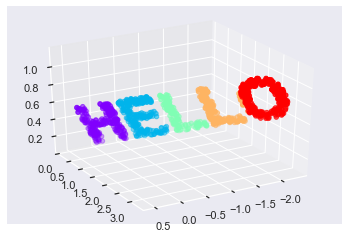

In [9]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:,0], X3[:,1],X3[:,2],
            **colorize)
ax.view_init(azim = 60, elev = 30)  # 카메라가 보는 각도

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

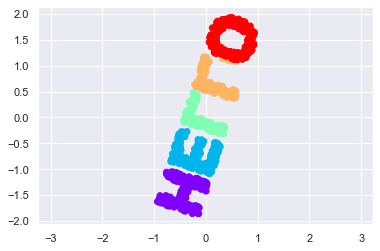

In [10]:
model = MDS(n_components=2 , random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

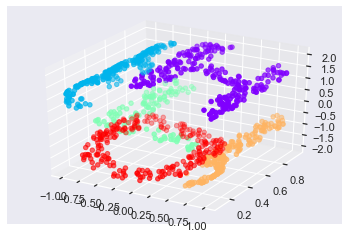

In [11]:
def make_hello_s_curve(X) :
    t = (X[:,0]-2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t)-1) # sign = +-
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = '3d')
ax.scatter(XS[:,0], XS[:,1], XS[:,2],**colorize)

# ==> MDS는 선형에는 강하지만 비선형에는 취약

(-1.1097992474489833,
 1.1098536944521915,
 0.02958197717253727,
 1.0142039520339077)

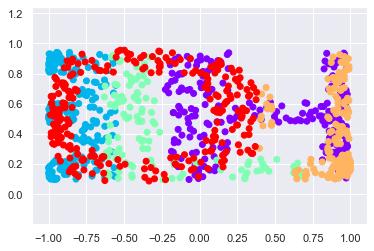

In [12]:
# MDS는 비선형에서 모양유지가 안됨

model = MDS(n_components=2 , random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(XS[:,0], XS[:,1], **colorize)
plt.axis('equal')

(0.15, -0.15)

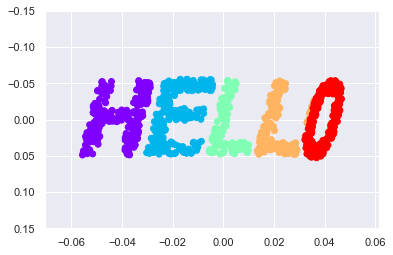

In [13]:
# LLE(locally linear embedding)
#- 비선형에 강함

from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2, method = 'modified', # 가까이있는 100개의 요소를 확인하고 2차원으로 차원 축소
                              eigen_solver = 'dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0],out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [14]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn import manifold
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import os  # 디렉토리 관리
CHART_DIR = './'
colors = ['r','g','b']
markers = ['o',6,'+']
def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)  # 변수4개 -> 3개
    Xtrans = mds.fit_transform(X) # 150x3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 각도 조절

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 

C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

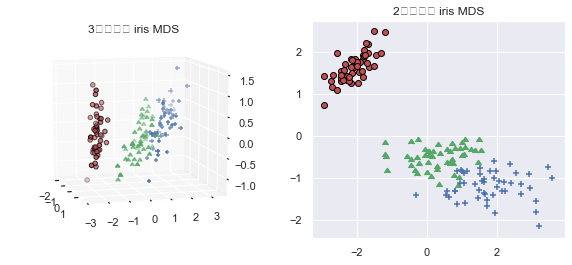

In [15]:
plot_iris_mds()

In [16]:
# Kmeans  :  군집분석 -> 종속변수결정
# - 압축 : 팔레트, 실제데이터 : 팔레트 번호(256) 1바이트로 표현 가능
# - 원형이상치 제거

# 알고리즘 : k값을 결정(군집수결정) , 중심값 결정 , 이상치에 민감함
# => 데이터를 잘 모르는데 군집수와 중심값을 결정해야함 , 중심값을 계속 재계산하므로 이상치에 민감함
# kmeans 척도 : 거리값
# => 피타고라스 정의  -> euclidian distance
# DBSCAN : eps(기본거리값), 군집이 되기 위한 최소요소수
# - 근거리에 있는 것 끼리 군집을 이룸 => 핵심값, 경계값, 어느 군집에도 속하지 않는 것 

In [17]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([51.22, 71.608, -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
dist_64_np = np.array([np.linalg.norm(a_64-b_64)],
                     dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32-b_32)],
                     dtype = np.float32)


dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32],
                                                   metric = 'manhattan') # default : euclidian distance
from sklearn.metrics.pairwise import euclidean_distances

# ==> 특성이 가까운 거리에 있는지 멀리 있는지 구별하기 위해서 거리값 계산함

In [18]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# kmeans, PCA는 전처리에 민감함( 전처리를 안하면 사이즈 크면 거리가 멀게 나타남 )

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수 : 0.95


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv =5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("데스트 점수 : {:.2f}".format(grid.score(X_test_scaled,y_test)))
print("최적의 매개변수 : ",grid.best_params_)

최상의 교차 검증 정확도 : 0.98
데스트 점수 : 0.97
최적의 매개변수 :  {'C': 1, 'gamma': 1}


In [20]:
#파이프라인을 이용해서 코드 줄이기

from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',MinMaxScaler()),('svm',SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))



from sklearn.model_selection import GridSearchCV
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv =5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("데스트 점수 : {:.2f}".format(grid.score(X_test_scaled,y_test)))
print("최적의 매개변수 : ",grid.best_params_)

테스트 점수 : 0.95


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


최상의 교차 검증 정확도 : 0.98
데스트 점수 : 0.97
최적의 매개변수 :  {'svm__C': 1, 'svm__gamma': 1}


중심값 : 
 [[5.22068966 3.66551724]
 [6.8804878  3.09756098]
 [4.77777778 2.94444444]
 [5.9245283  2.7509434 ]]


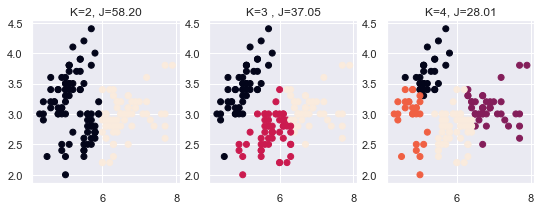

In [21]:
# 초기 중심값이 결정 =>중심을 지속적으로 변화
# 중심과의 거리값

from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
iris=  datasets.load_iris()
X = iris.data[:,:2]   # 전체변수 4개 => 2개
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9,3)); plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=km2.labels_) # c : color  == km2 labels : 0또는 1
plt.title("K=2, J=%.2f" % km2.inertia_)  # 군집 내부 거리 값 합계
plt.subplot(132); plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3 , J=%.2f" % km3.inertia_)
plt.subplot(133); plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
print("중심값 : \n",km4.cluster_centers_)

In [22]:
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [23]:
km2.inertia_

58.20409278906671

In [24]:
iris.data[:,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


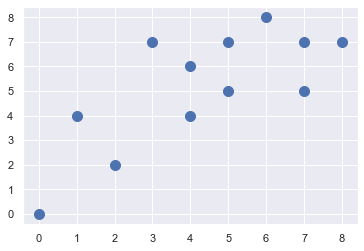

In [25]:
X = np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],[0,0],
              [2,2],[8,7],[6,8],[5,5],[3,7]])
print(X)
plt.scatter(X[:,0], X[:,1], s = 100)
plt.show()

12


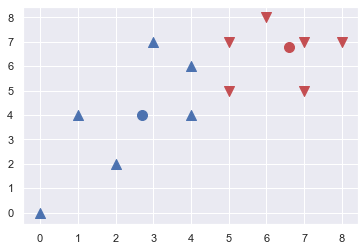

In [26]:
from sklearn.cluster import KMeans
# 레이블 : 군집번호 : 종속변수로씀
model = KMeans(n_clusters = 2, init='random', n_init = 1, max_iter = 1,
              random_state = 1).fit(X)
c0 , c1 = model.cluster_centers_
print(len(model.labels_))
#boolean indexing
plt.scatter(X[model.labels_ ==0,0], X[model.labels_==0,1], s= 100, marker='v',c='r')
plt.scatter(X[model.labels_ ==1,0], X[model.labels_==1,1], s= 100, marker='^',c='b')
plt.scatter(c0[0], c0[1], s=100, c= 'r')
plt.scatter(c1[0], c1[1], s=100, c= 'b')
plt.show()

In [27]:
print(X[model.labels_ ==0,0])
print(X)


[7 5 7 8 6 5]
[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


In [28]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)



n_colors = 64
china = load_sample_image('flower.jpg')  # RGB (256컬러 : 1바이트 )
#z컬러값 정규화( 0~1 정규화 )
china = np.array(china, dtype=np.float64) / 255


# width, height , color
w,h,d = original_shape=tuple(china.shape)  # 이미지 행x열, 컬러값
print(w, h,d) 
assert d ==3  # == RGB값만 들어와라 (흑백은 1바이트 )
image_array = np.reshape(china, (w*h, d)) # 2차원

427 640 3


In [29]:
image_array_sample = shuffle(image_array, random_state=0)[:1000] # 1000개 행
kmeans = KMeans(n_clusters = n_colors, random_state =0).fit(image_array_sample) #64컬러로 군집화

#==> 64개 중심값 결정 
kmeans.cluster_centers_

array([[0.9092006 , 0.69170437, 0.45248869],
       [0.00384615, 0.21538462, 0.2311463 ],
       [0.75058824, 0.34588235, 0.11764706],
       [0.00404412, 0.04828431, 0.02512255],
       [0.0015083 , 0.29969834, 0.36455505],
       [0.81107266, 0.56493656, 0.30426759],
       [0.06617647, 0.15735294, 0.1372549 ],
       [0.60522876, 0.00392157, 0.00392157],
       [0.01929825, 0.09896801, 0.07234262],
       [0.0442577 , 0.19495798, 0.16993464],
       [0.21568627, 0.21715686, 0.0627451 ],
       [0.53490196, 0.37411765, 0.21098039],
       [0.85980392, 0.70588235, 0.55392157],
       [0.81960784, 0.02745098, 0.00980392],
       [0.86823529, 0.58627451, 0.3754902 ],
       [0.00381264, 0.28300654, 0.27636166],
       [0.85555556, 0.2745098 , 0.01503268],
       [0.26901961, 0.32862745, 0.24235294],
       [0.90745098, 0.57019608, 0.30235294],
       [0.00196078, 0.37568627, 0.35941176],
       [0.02487745, 0.1442402 , 0.12647059],
       [0.76302521, 0.46946779, 0.26498599],
       [0.

In [30]:
t0 = time()
labels = kmeans.predict(image_array) # 64개 중심값으로 image_array 전체를 predict

# 427 x 640개의 labels 생성
labels

array([59, 59, 59, ..., 58, 58, 28])

In [31]:
def recreate_image(codebook, labels , w, h) :  # codebook : 64컬러값 , labels : 이미지픽셀수
    d = codebook.shape[1]   # 64x3 (중심값 x rgb(3))
    image = np.zeros((w, h, d)) # 원래 이미지 사이즈
    label_idx = 0
    for i in range(w):
        for j in range(h) :
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

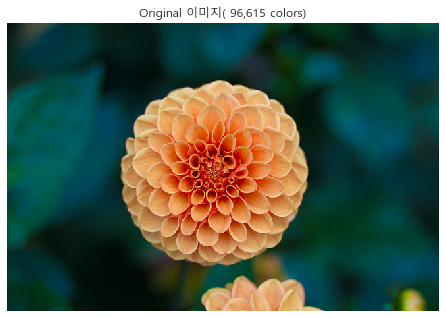

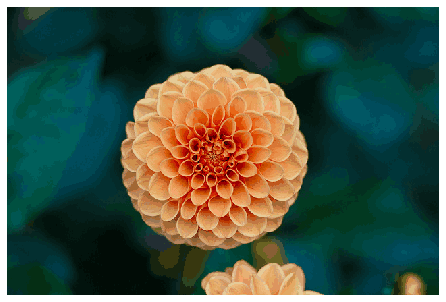

In [32]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지( 96,615 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

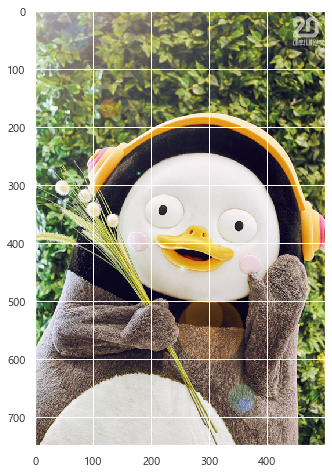

In [33]:
image = plt.imread('제주.png')
plt.figure(figsize= (15,8))
plt.imshow(image)

In [34]:
image.shape

(750, 500, 4)

In [35]:
image.shape[0] * image.shape[1] * image.shape[2]

1500000

In [36]:
x, y,  z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x*y , z) # kmeans는 3차원을 이해하지 못하므로 2차원으로 바꿈
image_2d.shape

(375000, 4)

In [37]:
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.00240927, 0.002563  , 0.0012055 , 0.00392157],
       [0.00149676, 0.00127826, 0.00107887, 0.00392157],
       [0.0033696 , 0.00331986, 0.00323298, 0.00392157],
       [0.00105763, 0.00103253, 0.00083121, 0.00392157],
       [0.00186278, 0.00167044, 0.00137079, 0.00392157],
       [0.00301163, 0.00298697, 0.00266471, 0.00392157],
       [0.00271953, 0.00288375, 0.00178794, 0.00392157],
       [0.0019419 , 0.00212592, 0.00093159, 0.00392157],
       [0.00028909, 0.00023505, 0.00052967, 0.00392157],
       [0.00361904, 0.00355755, 0.00353328, 0.00392157],
       [0.00356913, 0.0031572 , 0.00165231, 0.00392157],
       [0.00257209, 0.00245199, 0.00231931, 0.00392157],
       [0.00136533, 0.00167687, 0.00088562, 0.00392157],
       [0.00341901, 0.00241398, 0.00048241, 0.00392157],
       [0.0022294 , 0.00207801, 0.00173796, 0.00392157],
       [0.00069492, 0.0006664 , 0.00066745, 0.00392157]])

In [38]:
len(cluster_centers)

16

In [39]:
cluster_centers.shape

(16, 4)

In [40]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([ 9,  2,  9, ..., 12, 12,  7])

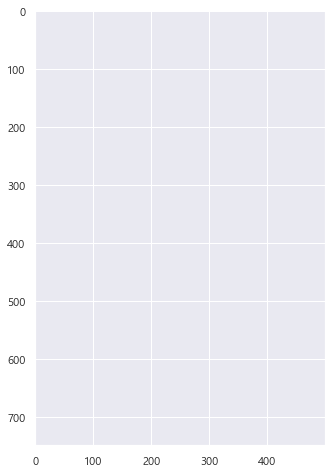

In [43]:
plt.figure(figsize= (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [ ]:
# 원형 이상치 제거

from sklearn.datasets import make_blobs
X ,label = make_blobs(100, centers = 1)

In [48]:
kmeans = KMeans(n_clusters= 1)
kmeans.fit(X)
distances = kmeans.transform(X)  # 각 데이터의 중심으로부터 거리값으로 변환
# ravel() : 1차원으로 변환
sorted_idx = np.argsort(distances.ravel())[::-1][:5]  #::-1 : 내림차순
# argsort : 값이 아닌, 인덱스로 출력( sort결과에 따라 )

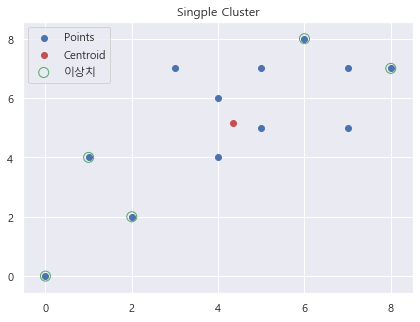

In [49]:
f , ax = plt.subplots(figsize=(7,5))
ax.set_title('Singple Cluster')
ax.scatter(X[:,0],X[:,1], label= 'Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label = 'Centroid', color='r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label = '이상치', edgecolors='g',
          facecolors='none', s= 100)
ax.legend(loc='best')

In [55]:
# PCA : Principle component Analysis 주성분 분석
# 모델 입력 전단에서 특징 추출( noise 제거 )
# PCA의 결과를 모델의 변수로 추가하면 정확도 향상

import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1], [-2,-1],[-3,-2],[1,1],[2,1],[3,2]]) # 6x2
pca = PCA(n_components = 2)  # 주성분 2개
pca.fit(X)
print(pca.explained_variance_ratio_)  # 설명력 ( 비율 )
# 차원 축소 후에 분석을 하면 좋은점 :
# - noise 제거 
# - 속도 개선
# - 차원의 저주( 변수가 너무 많으면 문제해결 안됨 ) => 복잡한 문제 해결 가능
print(pca.explained_variance_)  # 분산   - 분산이 큰 것이 주성분
print(pca.noise_variance_)

[0.99244289 0.00755711]
[7.93954312 0.06045688]
0.0


In [56]:

#svd singular value decomposition : 희소행렬에서 특징추출, 비정방행렬인 경우 사용
pca = PCA(n_components=2 , svd_solver = 'full')  
#full : 전체값을 다 계산한다  randomized : 랜덤하게(사이즈가 아주 클 때 500x500이상 ) arpack(0이 많이 나올 때, 0을 줄여서 출력)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [59]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도: 0.62


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_scaled.shape

(569, 30)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태 : (569, 30)
축소 데이터 형태 : (569, 30)


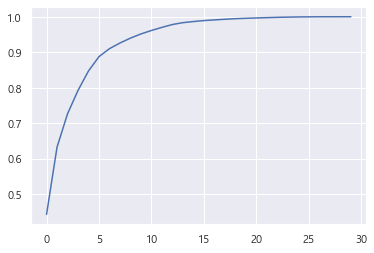

In [87]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
# 2개의 주성분 출력
X_pca = pca.transform(X_scaled)
# 28개의 특성을 제거
print(pca.explained_variance_ratio_)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소 데이터 형태 : {}".format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인

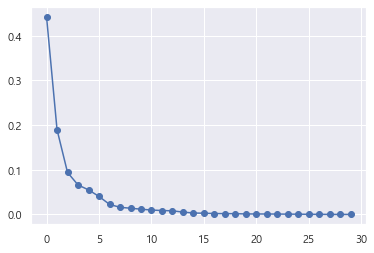

In [88]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Z점수 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM테스트 정확도 : {:.2f}".format(svm.score(X_t_test, y_test)))

# 6: 0.92
# 9 : 0.94
# 30 : 0.97

SVM테스트 정확도 : 0.92


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
print("PCA 주성분 형태 : {}".format(pca.components_.shape))
# 주성분6개를 변수 30개가 영향을 미쳐 만든 것 => 주성분의 명명필요 ( 변수의 기여도를 바탕으로 명명식 )

PCA 주성분 형태 : (6, 30)


In [92]:
print("PCA 주성분 : {}".format(pca.components_))
# ==> 첫번째 주성분 중 , 9.25와 4.44가 가장 큰 영향을 준 것

PCA 주성분 : [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-

array([[ 0.15850234, -1.23049032,  0.25369143, ..., -0.05738582,
        -0.08689656,  0.48863884],
       [-0.2638036 , -0.15450952, -0.23961754, ...,  1.41330744,
         1.77388495,  2.02105229],
       [-0.32492682, -0.76147305, -0.35407811, ..., -0.1354226 ,
         0.87210827,  0.71179432],
       ...,
       [ 0.25852216, -0.06024625,  0.21500053, ..., -0.03937733,
        -1.03202789, -0.84910706],
       [ 1.46709506,  0.95825694,  1.49824869, ...,  0.62693676,
         0.07438274, -0.45739797],
       [-0.61942964,  0.42256565, -0.6261235 , ..., -0.48013509,
         0.34318156, -0.6134881 ]])

C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


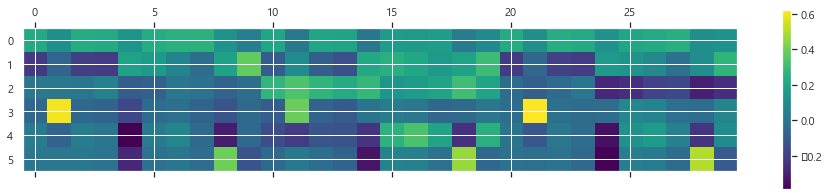

In [95]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

(87, 65)


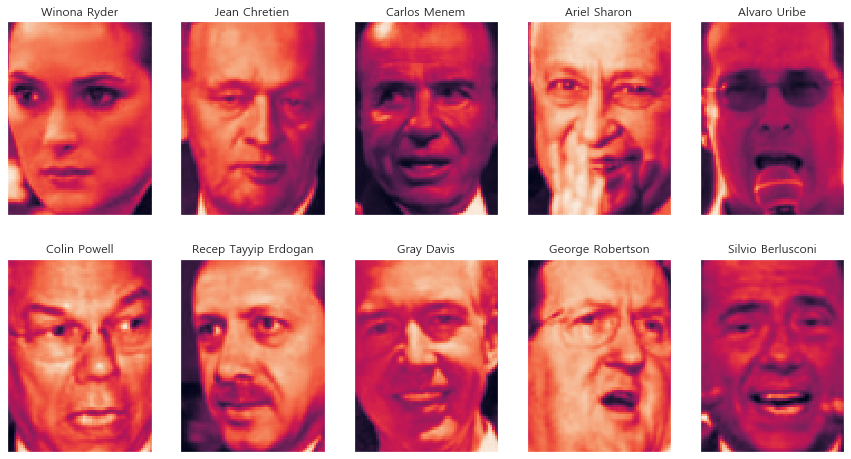

In [96]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person= 20, resize = 0.7)
image_shape = people.images[0].shape
print(image_shape) # 87 * 65(가로 x 세로)
fig , axes = plt.subplots(2, 5, figsize=(15,8),
                         subplot_kw = {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()) :
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [99]:
print("이미지사이즈 : {}".format(people.images.shape))
print("클래스 개수 : {}".format(len(people.target_names)))

이미지사이즈 : (3023, 87, 65)
클래스 개수 : 62


In [100]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target== target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/ 255

In [101]:
X_train, X_test , y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

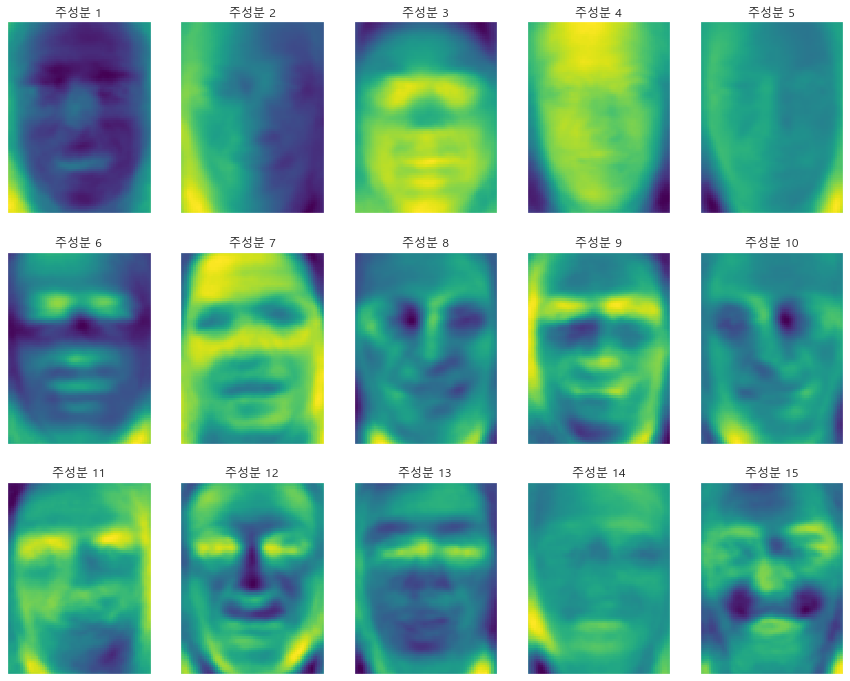

In [103]:
fig , axes = plt.subplots(3, 5, figsize = (15,12),
                         subplot_kw = {'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())) :
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i+1)))

In [ ]:
# 컴퓨터가 주성분분석을 통해 찾아낸 주성분
# 100개를 합하여 출력, 원본이미지를 복원 ==> ANN의 가중치 특징도